In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame([{'Name' : 'Chris', 'Item' : 'Sponge', 'Cost' : 22.5},
                  {'Name' : 'Kevyn', 'Item' : 'Kity Litter', 'Cost' : 2.5},
                  {'Name' : 'Filip', 'Item' : 'Spoon', 'Cost' : 5}],
                 index = ['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kity Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [3]:
df['Data'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item,Name,Data
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kity Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [4]:
df['Delivered'] = True
df

,Cost,Item,Name,Data,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kity Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [5]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item,Name,Data,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kity Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [6]:
adf = df.reset_index()
adf

,index,Cost,Item,Name,Data,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kity Litter,Kevyn,January 1,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [7]:
df

,Cost,Item,Name,Data,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kity Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [8]:
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item,Name,Data,Delivered,Feedback,Date
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive,December 1
1,Store 1,2.5,Kity Litter,Kevyn,January 1,True,None,NaN
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative,mid-May


In [21]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role' : 'Director'},
                        {'Name':'Sally', 'Role':'Liason'},
                        {'Name':'James', 'Role':'Grader'}])
staff_df = staff_df.set_index('Name')
staff_df

,Role
Name,
Kelly,Director
Sally,Liason
James,Grader


In [22]:
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [12]:
pd.merge(staff_df, student_df, how = 'outer', left_index = True, right_index = True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director,NaN
Mike,NaN,Law
Sally,Liason,Engineering


In [13]:
pd.merge(staff_df, student_df, how = 'inner', left_index = True, right_index = True)

,Role,School
Name,,
Sally,Liason,Engineering
James,Grader,Business


In [17]:
pd.merge(staff_df, student_df, how = 'left', left_index = True, right_index = True)

,Role,School
Name,,
Kelly,Director,NaN
Sally,Liason,Engineering
James,Grader,Business


In [18]:
pd.merge(staff_df, student_df, how= 'right', left_index = True, right_index = True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Liason,Engineering


In [23]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how = 'left', left_on = 'Name', right_on = 'Name')

,Name,Role,School
0,Kelly,Director,NaN
1,Sally,Liason,Engineering
2,James,Grader,Business


In [24]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [26]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
print(staff_df)
print(student_df)
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

  First Name   Last Name            Role
0      Kelly  Desjardins  Director of HR
1      Sally      Brooks  Course liasion
2      James       Wilde          Grader
  First Name Last Name       School
0      James   Hammond     Business
1       Mike     Smith          Law
2      Sally    Brooks  Engineering


,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


In [52]:
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [53]:
(df.where(df['SUMLEV'] == 50)
    .dropna()
    .set_index(['STNAME', 'CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [29]:
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [30]:
df = df[df['SUMLEV'] == 50]
df.set_index(['STNAME','CTYNAME'], inplace = True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County          50       3         6      1       1   
          Baldwin County          50       3         6      1       3   
          Barbour County          50       3         6      1       5   
          Bibb County             50       3         6      1       7   
          Blount County           50       3         6      1       9   
          Bullock County          50       3         6      1      11   
          Butler County           50       3         6      1      13   
          Calhoun County          50       3         6      1      15   
          Chambers County         50       3         6      1      17   
          Cherokee County         50       3         6      1      19   
          Chilton County          50       3         6      1      21   
          Choctaw County          50       3         6      1      23   
          Clarke County           50       3         6      1      25   
          Clay County             50       3         6      1      27   
          Cleburne County         50       3         6      1      29   
          Coffee County           50       3         6      1      31   
          Colbert County          50       3         6      1      33   
          Conecuh County          50       3         6      1      35   
          Coosa County            50       3         6      1      37   
          Covington County        50       3         6      1      39   
          Crenshaw County         50       3         6      1      41   
          Cullman County          50       3         6      1      43   
          Dale County             50       3         6      1      45   
          Dallas County           50       3         6      1      47   
          DeKalb County           50       3         6      1      49   
          Elmore County           50       3         6      1      51   
          Escambia County         50       3         6      1      53   
          Etowah County           50       3         6      1      55   
          Fayette County          50       3         6      1      57   
          Franklin County         50       3         6      1      59   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County         50       2         3     55     129   
          Washington County       50       2         3     55     131   
          Waukesha County         50       2         3     55     133   
          Waupaca County          50       2         3     55     135   
          Waushara County         50       2         3     55     137   
          Winnebago County        50       2         3     55     139   
          Wood County             50       2         3     55     141   
Wyoming   Albany County           50       4         8     56       1   
          Big Horn County         50       4         8     56       3   
          Campbell County         50       4         8     56       5   
          Carbon County           50       4         8     56       7   
          Converse County         50       4         8     56       9   
          Crook County            50       4         8     56      11   
          Fremont County          50       4         8     56      13   
          Goshen County           50       4         8     56      15   
          Hot Springs County      50       4         8     56      17   
          Johnson County          50       4         8     56      19   
          Laramie County          50       4         8     56      21   
          Lincoln County          50       4         8     56      23   
          Natrona County          50       4         8     56      25   
          Niobrara County         50       4         8     56      27   
          Park County             50       4         8     56      29   
          Platt

In [31]:
df.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County          54571              54571            54660   
        Baldwin County         182265             182265           183193   
        Barbour County          27457              27457            27341   
        Bibb County             22915              22919            22861   
        Blount County           57322              57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County            55253            55175     ...        
        Baldwin County           186659           190396     ...        
        Barbour County            27226            27159     ...        
        Bibb County               22733            22642     ...        
        Blount County             57711            57776     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [32]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min':np.min(data), 'max':np.max(data)})

In [33]:
df.apply(min_max, axis = 1)

max       min
STNAME    CTYNAME                               
Alabama   Autauga County       55347.0   54660.0
          Baldwin County      203709.0  183193.0
          Barbour County       27341.0   26489.0
          Bibb County          22861.0   22512.0
          Blount County        57776.0   57373.0
          Bullock County       10887.0   10606.0
          Butler County        20944.0   20154.0
          Calhoun County      118437.0  115620.0
          Chambers County      34153.0   33993.0
          Cherokee County      26084.0   25859.0
          Chilton County       43943.0   43665.0
          Choctaw County       13841.0   13170.0
          Clarke County        25767.0   24675.0
          Clay County          13880.0   13456.0
          Cleburne County      15072.0   14921.0
          Coffee County        51211.0   50177.0
          Colbert County       54514.0   54354.0
          Conecuh County       13208.0   12662.0
          Coosa County         11758.0   10724.0
          Covington County     38060.0   37796.0
          Crenshaw County      13963.0   13853.0
          Cullman County       82005.0   80374.0
          Dale County          50358.0   49501.0
          Dallas County        43803.0   41131.0
          DeKalb County        71387.0   70869.0
          Elmore County        81468.0   79465.0
          Escambia County      38309.0   37784.0
          Etowah County       104442.0  103057.0
          Fayette County       17231.0   16759.0
          Franklin County      31734.0   31507.0
...                                ...       ...
Wisconsin Washburn County      15930.0   15552.0
          Washington County   133674.0  131967.0
          Waukesha County     396488.0  390076.0
          Waupaca County       52422.0   51945.0
          Waushara County      24581.0   24033.0
          Winnebago County    169639.0  167059.0
          Wood County          74807.0   73435.0
Wyoming   Albany County        37956.0   36428.0
          Big Horn County      12022.0   11672.0
          Campbell County      49220.0   46244.0
          Carbon County        15856.0   15559.0
          Converse County      14343.0   13728.0
          Crook County          7444.0    7114.0
          Fremont County       41129.0   40222.0
          Goshen County        13666.0   13383.0
          Hot Springs County    4846.0    4741.0
          Johnson County        8636.0    8552.0
          Laramie County       97121.0   92271.0
          Lincoln County       18722.0   17943.0
          Natrona County       82178.0   75472.0
          Niobrara County       2548.0    2475.0
          Park County          29237.0   28259.0
          Platte County         8812.0    8678.0
          Sheridan County      30020.0   29146.0
          Sublette County      10418.0    9899.0
          Sweetwater County    45162.0   43593.0
          Teton County         23125.0   21297.0
          Uinta County         21102.0   20822.0
          Washakie County       8545.0    8316.0
          Weston County         7234.0    7065.0

[3142 rows x 2 columns]

In [34]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row

In [35]:
df.apply(min_max, axis = 1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [38]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis = 1)

STNAME     CTYNAME           
Alabama    Autauga County         55347.0
           Baldwin County        203709.0
           Barbour County         27341.0
           Bibb County            22861.0
           Blount County          57776.0
           Bullock County         10887.0
           Butler County          20944.0
           Calhoun County        118437.0
           Chambers County        34153.0
           Cherokee County        26084.0
           Chilton County         43943.0
           Choctaw County         13841.0
           Clarke County          25767.0
           Clay County            13880.0
           Cleburne County        15072.0
           Coffee County          51211.0
           Colbert County         54514.0
           Conecuh County         13208.0
           Coosa County           11758.0
           Covington County       38060.0
           Crenshaw County        13963.0
           Cullman County         82005.0
           Dale County            50358.0
    

In [40]:
for group, frame in df.groupby('STNAME'):
#     print(group)
#     print(frame)
    avg = np.average(frame['CENSUS2010POP'])
    print(group, avg)

Alabama 71339.34328358209
Alaska 24490.724137931036
Arizona 426134.4666666667
Arkansas 38878.90666666667
California 642309.5862068966
Colorado 78581.1875
Connecticut 446762.125
Delaware 299311.3333333333
District of Columbia 601723.0
Florida 280616.5671641791
Georgia 60928.63522012578
Hawaii 272060.2
Idaho 35626.86363636364
Illinois 125790.50980392157
Indiana 70476.10869565218
Iowa 30771.262626262625
Kansas 27172.55238095238
Kentucky 36161.39166666667
Louisiana 70833.9375
Maine 83022.5625
Maryland 240564.66666666666
Massachusetts 467687.78571428574
Michigan 119080.0
Minnesota 60964.65517241379
Mississippi 36186.54878048781
Missouri 52077.62608695652
Montana 17668.125
Nebraska 19638.075268817203
Nevada 158855.9411764706
New Hampshire 131647.0
New Jersey 418661.61904761905
New Mexico 62399.36363636364
New York 312550.03225806454
North Carolina 95354.83
North Dakota 12690.396226415094
Ohio 131096.63636363635
Oklahoma 48718.844155844155
Oregon 106418.72222222222
Pennsylvania 189587.7462686

In [54]:
# df = df.set_index('STNAME')
df = df.set_index('STNAME')


def fun(item):
    if item[0] < 'M':
        return 0
    if item[0] < 'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print(str(group))
    print(frame)

0
           SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME                                               
Alabama        40       3         6      1       0   
Alabama        50       3         6      1       1   
Alabama        50       3         6      1       3   
Alabama        50       3         6      1       5   
Alabama        50       3         6      1       7   
Alabama        50       3         6      1       9   
Alabama        50       3         6      1      11   
Alabama        50       3         6      1      13   
Alabama        50       3         6      1      15   
Alabama        50       3         6      1      17   
Alabama        50       3         6      1      19   
Alabama        50       3         6      1      21   
Alabama        50       3         6      1      23   
Alabama        50       3         6      1      25   
Alabama        50       3         6      1      27   
Alabama        50       3         6      1      29   
Alabama        50       3 

In [55]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [56]:
df.groupby('STNAME').agg({'CENSUS2010POP' : np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [58]:
type(df.groupby(level = 0)['POPESTIMATE2010','POPESTIMATE2011'])
type(df.groupby(level = 0)['POPESTIMATE2010'])

pandas.core.groupby.SeriesGroupBy

In [59]:
df.set_index('STNAME').groupby(level = 0)['CENSUS2010POP'].agg({'avg':np.average, 'sum': np.sum})

/Users/xinxiaoxue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [61]:
df.set_index('STNAME').groupby(level = 0)['POPESTIMATE2010','POPESTIMATE2011'].agg({'avg':np.average, 'sum':np.sum})

/Users/xinxiaoxue/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [62]:
df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'].agg({'POPESTIMATE2010':np.average, 'POPESTIMATE2011':np.sum})

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


In [7]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                 index = ['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns = {0:'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [9]:
grades = df['Grades'].astype('category', categories = ['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered = True)
grades

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [10]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [12]:
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV'] == 50]
df= df.set_index('STNAME').groupby(level = 0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'], 10)

/Users/xinxiaoxue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

In [13]:
df = pd.read_csv('cars.csv')

In [14]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7


In [16]:
df.pivot_table(values = '(kW)', index = 'YEAR', columns = 'Make', aggfunc = np.mean)


Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [18]:
df.pivot_table(values = '(kW)', index = 'YEAR', columns = 'Make', aggfunc = [np.mean, np.min], margins = True)


mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

            
Make   All  
YEAR        
2012  49.0  
2013  35.0  
2014  35.0  
2015  35.0  
2016  35.0  
All   35.0

In [19]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

In [20]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [21]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [24]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [25]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [27]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Series('2016-10'), pd.Period('2016-11')])
t2

2016-09      d
[2016-10]    e
2016-11      f
dtype: object

In [28]:
type(t2.index)

pandas.core.indexes.base.Index

In [29]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10,100,(4,2)), index = d1, columns=list('ab'))
ts3

,a,b
2 June 2013,34,89
"Aug 29, 2014",58,14
2015-06-26,38,55
7/12/16,50,26


In [30]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,34,89
2014-08-29,58,14
2015-06-26,38,55
2016-07-12,50,26


In [33]:
pd.to_datetime('4.7.12', dayfirst = True)

Timestamp('2012-07-04 00:00:00')

In [35]:
pd.Timestamp('9/3/2019') - pd.Timestamp('9/1/2016')

Timedelta('1097 days 00:00:00')

In [36]:
pd.Timestamp('9/2/2016') + pd.Timedelta('12D 5H')

Timestamp('2016-09-14 05:00:00')

In [44]:
dates = pd.date_range('10-01-2016', periods = 12, freq = '2W-Mon')
dates

DatetimeIndex(['2016-10-03', '2016-10-17', '2016-10-31', '2016-11-14',
               '2016-11-28', '2016-12-12', '2016-12-26', '2017-01-09',
               '2017-01-23', '2017-02-06', '2017-02-20', '2017-03-06'],
              dtype='datetime64[ns]', freq='2W-MON')

In [45]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 12).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 12)}, index = dates)
df

,Count 1,Count 2
2016-10-03,106,122
2016-10-17,103,123
2016-10-31,112,129
2016-11-14,108,128
2016-11-28,112,123
2016-12-12,118,119
2016-12-26,121,116
2017-01-09,125,119
2017-01-23,121,125
2017-02-06,123,124


In [46]:
df.index.weekday_name


Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday'],
      dtype='object')

In [47]:
df.diff()

,Count 1,Count 2
2016-10-03,NaN,NaN
2016-10-17,-3.0,1.0
2016-10-31,9.0,6.0
2016-11-14,-4.0,-1.0
2016-11-28,4.0,-5.0
2016-12-12,6.0,-4.0
2016-12-26,3.0,-3.0
2017-01-09,4.0,3.0
2017-01-23,-4.0,6.0
2017-02-06,2.0,-1.0


In [49]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,107.0,124.666667
2016-11-30,110.0,125.500000
2016-12-31,119.5,117.500000
2017-01-31,123.0,122.000000
2017-02-28,123.5,122.000000
2017-03-31,132.0,118.000000


In [50]:
df['2017']

,Count 1,Count 2
2017-01-09,125,119
2017-01-23,121,125
2017-02-06,123,124
2017-02-20,124,120
2017-03-06,132,118


In [51]:
df['2016-12']

,Count 1,Count 2
2016-12-12,118,119
2016-12-26,121,116


In [52]:
df['2016-12':]

,Count 1,Count 2
2016-12-12,118,119
2016-12-26,121,116
2017-01-09,125,119
2017-01-23,121,125
2017-02-06,123,124
2017-02-20,124,120
2017-03-06,132,118


In [53]:
df.asfreq('W', method = 'ffill')

,Count 1,Count 2
2016-10-09,106,122
2016-10-16,106,122
2016-10-23,103,123
2016-10-30,103,123
2016-11-06,112,129
2016-11-13,112,129
2016-11-20,108,128
2016-11-27,108,128
2016-12-04,112,123
2016-12-11,112,123


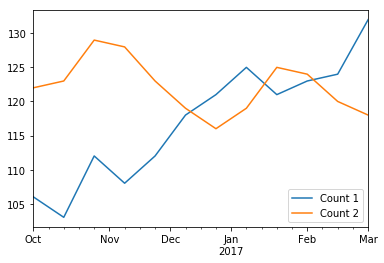

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

In [225]:
df = pd.read_excel('Energy Indicators.xls',usecols = [2,3,4,5],index_col = 0, skiprows = range(17), skipfooter = 38)
df.index.name = 'Country'
df.rename(index = str, columns = {'Petajoules':'Energy Supply', 'Gigajoules':'Energy Supply per Capita', '%':'% Renewable'}, inplace = True)
df = df.replace('...', np.nan)
df['Energy Supply'] *= 1000000
df.index = df.index.str.replace('\d+', '')
df.index = df.index.str.replace(r" \(.*\)","")
df.rename({'Republic of Korea':'South Korea', 'United States of America':'United States','United Kingdom of Great Britain and Northern Ireland':'United Kingdom', 'China, Hong Kong Special Administrative Region': 'Hong Kong'}, inplace = True)

df = df.dropna()
df

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
Andorra,9.000000e+06,121.0,88.695650
Angola,6.420000e+08,27.0,70.909090
Anguilla,2.000000e+06,136.0,0.000000
Antigua and Barbuda,8.000000e+06,84.0,0.000000
Argentina,3.378000e+09,79.0,24.064520
Armenia,1.430000e+08,48.0,28.236060


In [81]:
import numpy as np

In [109]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.8.final.0
python-bits: 64
OS: Darwin
OS-release: 18.6.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: en_US.UTF-8
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.20.3
pytest: 3.2.1
pip: 9.0.1
setuptools: 36.5.0.post20170921
Cython: 0.26.1
numpy: 1.16.3
scipy: 1.2.1
xarray: None
IPython: 6.1.0
sphinx: 1.6.3
patsy: 0.4.1
dateutil: 2.6.1
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.9
feather: None
matplotlib: 2.1.0
openpyxl: 2.4.8
xlrd: 1.1.0
xlwt: 1.2.0
xlsxwriter: 1.0.2
lxml: 4.1.0
bs4: 4.6.0
html5lib: 0.999999999
sqlalchemy: 1.1.13
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
pandas_gbq: None
pandas_datareader: None


In [219]:
GDP = pd.read_csv('world_bank.csv',index_col = 0, skiprows = [0,1,2,3])
GDP.rename({'Korea, Rep.':'South Korea', 'Iran, Islamic Rep.': 'Iran', 'Hong Kong SAR, China':'Hong Kong'}, inplace = True)
GDP_col = [ '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
GDP = GDP[GDP_col]
GDP = GDP.dropna()
GDP

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
Arab World,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
United Arab Emirates,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
Armenia,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
Antigua and Barbuda,1.268714e+09,1.389229e+09,1.390217e+09,1.222890e+09,1.135539e+09,1.115174e+09,1.159999e+09,1.155982e+09,1.211723e+09,1.256122e+09
Australia,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Austria,3.782096e+11,3.919065e+11,3.979703e+11,3.828512e+11,3.902351e+11,4.011929e+11,4.042312e+11,4.055298e+11,4.069632e+11,4.104717e+11


In [220]:
ScimEn = pd.read_excel('scimagojr-3.xlsx', index_col = 1)
ScimEn = ScimEn[0:15]
ScimEn = ScimEn.dropna()
# ScimEn.shape

In [162]:
data_frames = [ScimEn, df, GDP]
data_frames

[                                Rank  Documents  Citable documents  Citations  \
 Country                                                                         
 China                              1     127050             126767     597237   
 United States                      2      96661              94747     792274   
 Japan                              3      30504              30287     223024   
 United Kingdom                     4      20944              20357     206091   
 Russian Federation                 5      18534              18301      34266   
 Canada                             6      17899              17620     215003   
 Germany                            7      17027              16831     140566   
 India                              8      15005              14841     128763   
 France                             9      13153              12973     130632   
 South Korea                       10      11983              11923     114675   
 Italy          

In [226]:
# pd.merge(ScimEn, df, how = 'inner', on = 'Country')
# ScimEn.merge(df, how = 'inner')
df1 = pd.merge(ScimEn, df, how = 'left', left_index=True, right_index=True)
df2 = pd.merge(df1, GDP, left_index = True, right_index = True)
df2.index.name = 'Country'
# df2 = df2.dropna()
df2

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [132]:
from functools import reduce

In [177]:
df2.shape

(15, 20)

In [228]:
GDP_col = [ '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
# df2 = df2.dropna()
ans = df2.apply(lambda x: np.average(x[GDP_col]), axis = 1).sort_values()
ans

Country
South Korea           1.106715e+12
Australia             1.164043e+12
Spain                 1.418078e+12
Russian Federation    1.565459e+12
Canada                1.660647e+12
India                 1.769297e+12
Italy                 2.120175e+12
Brazil                2.189794e+12
United Kingdom        2.487907e+12
France                2.681725e+12
Germany               3.493025e+12
Japan                 5.542208e+12
China                 6.348609e+12
United States         1.536434e+13
dtype: float64

In [207]:
df2.loc['India']

Rank                        8.000000e+00
Documents                   1.500500e+04
Citable documents           1.484100e+04
Citations                   1.287630e+05
Self-citations              3.720900e+04
Citations per document      8.580000e+00
H index                     1.150000e+02
Energy Supply               3.319500e+10
Energy Supply per Capita    2.600000e+01
% Renewable                 1.496908e+01
2006                        1.265894e+12
2007                        1.374865e+12
2008                        1.428361e+12
2009                        1.549483e+12
2010                        1.708459e+12
2011                        1.821872e+12
2012                        1.924235e+12
2013                        2.051982e+12
2014                        2.200617e+12
2015                        2.367206e+12
Name: India, dtype: float64

In [231]:
# df2 = df2.dropna()
int(df2['Energy Supply per Capita'].mean())

160

In [232]:
df2

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [235]:
a = df2['% Renewable'].max()

In [236]:
b = df2['% Renewable'].argmax()

In [237]:
(a,b)

(69.64803, 'Brazil')

In [240]:
df2['Ratio'] = df2['Self-citations']/df2['Citations']
a = df2['Ratio'].argmax()
b = df2['Ratio'].max()
(a,b)

('China', 0.6893126179389422)

In [242]:
Top15 = df2
Top15['Populous'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
Top15['Populous'].sort_values(ascending = False)

Country
China                 1.367645e+09
India                 1.276731e+09
United States         3.176154e+08
Brazil                2.059153e+08
Russian Federation    1.435000e+08
Japan                 1.274094e+08
Germany               8.036970e+07
United Kingdom        6.387097e+07
France                6.383735e+07
Italy                 5.990826e+07
South Korea           4.980543e+07
Spain                 4.644340e+07
Canada                3.523986e+07
Australia             2.331602e+07
Name: Populous, dtype: float64

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [243]:
def answer_one():
    df = pd.read_excel('Energy Indicators.xls',usecols = [2,3,4,5],index_col = 0, skiprows = range(17), skipfooter = 38)
    df.index.name = 'Country'
    df.rename(index = str, columns = {'Petajoules':'Energy Supply', 'Gigajoules':'Energy Supply per Capita', '%':'% Renewable'}, inplace = True)
    df = df.replace('...', np.nan)
    df['Energy Supply'] *= 1000000
    df.index = df.index.str.replace('\d+', '')
    df.index = df.index.str.replace(' \(.*\)','')
    df.rename({'Republic of Korea':'South Korea', 'United States of America':'United States','United Kingdom of Great Britain and Northern Ireland':'United Kingdom', 'China, Hong Kong Special Administrative Region': 'Hong Kong'}, inplace = True)

    GDP = pd.read_csv('world_bank.csv',index_col = 0, skiprows = [0,1,2,3])
    GDP.rename({'Korea, Rep.':'South Korea', 'Iran, Islamic Rep.': 'Iran', 'Hong Kong SAR, China':'Hong Kong'}, inplace = True)
    GDP_col = [ '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    GDP = GDP[GDP_col]
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx', index_col = 1)
    ScimEn = ScimEn[0:15]

    df1 = pd.merge(ScimEn, df, how = 'left', left_index=True, right_index=True)
    df2 = pd.merge(df1, GDP, left_index = True, right_index = True)
    df2.index.name = 'Country'
    
    return df2

import pandas as pd
import numpy as np
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [245]:
def answer_three():
    Top15 = answer_one()
    GDP_col = [ '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    ans = Top15.apply(lambda x: np.average(x[GDP_col]), axis = 1).sort_values()

    return ans

answer_three()

Country
South Korea           1.106715e+12
Australia             1.164043e+12
Spain                 1.418078e+12
Russian Federation    1.565459e+12
Canada                1.660647e+12
India                 1.769297e+12
Italy                 2.120175e+12
Brazil                2.189794e+12
United Kingdom        2.487907e+12
France                2.681725e+12
Germany               3.493025e+12
Japan                 5.542208e+12
China                 6.348609e+12
United States         1.536434e+13
Iran                           NaN
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [246]:
def answer_four():
    Top15 = answer_one()
    return Top15.loc['United Kingdom']['2015'] - Top15.loc['United Kingdom']['2006']
answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [247]:
def answer_five():
    Top15 = answer_one()
    return np.mean(Top15['Energy Supply per Capita'])
answer_five()

157.6

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [248]:
def answer_six():
    Top15 = answer_one()
    a = Top15['% Renewable'].argmax()
    b = Top15['% Renewable'].max()
    return (a,b)
answer_six()

('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [249]:
def answer_seven():
    Top15 = answer_one()
    Top15['Ratio'] = Top15['Self-citations']/Top15['Citations']
    a = Top15['Ratio'].argmax()
    b = Top15['Ratio'].max()

    return (a,b)
answer_seven()

('China', 0.6893126179389422)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [250]:
def answer_eight():
    Top15 = answer_one()
    Top15['Populous'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']    
    return Top15[Top15['Populous'] == Top15['Populous'].sort_values(ascending = False).iloc[2]].index[0]
answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [251]:
def answer_nine():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    ans = Top15['Energy Supply per Capita'].astype('float64').corr(Top15['Citable docs per Capita'].astype('float64'))
    return ans
answer_nine()

0.7940010435442947

In [252]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

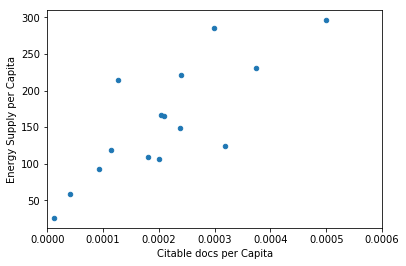

In [253]:
plot9()

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [254]:
def fun(x):
    Top15 = answer_one()
    med = Top15['% Renewable'].median()
    if x >= med:
        return 1
    else:
        return 0
    
def answer_ten():
    Top15 = answer_one()
    med = Top15['% Renewable'].median()
    Top15['HighRenew'] = Top15['% Renewable'].apply(fun)
#     Top15.set_value('Iran', 'HighRenew', 1)
#     Top15['renew']=np.where(Top15['% Renewable']>=Top15['% Renewable'].median(),1,0)
    return pd.Series(Top15.sort_values(by='Rank', ascending=True)['HighRenew'])
#     return Top15.sort_values(by='Rank', ascending=True)
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [255]:
def answer_eleven():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15 = answer_one()
    Top15['PopulationEst'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15 = Top15.reset_index()
    Top15['Continent'] = Top15['Country'].map(ContinentDict)
    df2 = Top15.groupby('Continent')['PopulationEst'].agg(['size', 'sum','mean','std'])
    return df2
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [256]:
def answer_twelve():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15 = answer_one()
    Top15 = Top15.reset_index()
    Top15['Continent'] = Top15['Country'].map(ContinentDict)
    
    Top15['cut'] = pd.cut(Top15['% Renewable'], 5)
    Top15 = Top15.groupby(['Continent','cut']).agg('size')
#     df2 = Top15.groupby('Continent')['cut'].agg(['size', 'sum'])


#     df2 = Top15.groupby('Continent', level = 2)['cut'].agg(sum())
#     Top15 = Top15.groupby(['Continent', 'cut'])
#     Top15 = Top15.groupby([pd.Grouper(level=0), 'cut']).sum()
#     Top15 = Top15.aggregate(np.sum)
    return Top15

answer_twelve()

Continent      cut             
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [257]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['Populous'] = Top15['Energy Supply']/Top15['Energy Supply per Capita'] 
    Top15['PopEst'] = Top15['Populous'].map('{:,}'.format)
    return Top15['PopEst']

answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object